<a href="https://colab.research.google.com/github/sanae-a11y/AI/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Scoring Application - Decision tree learning**
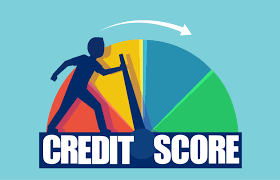

 


---

---
 



**Importing the librairies**


In [328]:
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd

**Import the dataset**

In [329]:
file = pd.read_csv("CreditScoring.csv")

**Understanding the data**

In [330]:
file.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [331]:
file.shape

(5960, 13)

In [332]:
data_types=file.dtypes #to print data types for each variable
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [333]:
#descriptive statistics
description= file.describe(include='all') # to get the basic summary of all the numeric columns and frequency distribution of all the categorical columns.
description


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


**The dependent variable**

A dependent variable is the variable that changes as a result of the independent variable manipulation. It's the outcome you're interested in measuring, and it “depends” on your independent variable.
Then we can say that the dependent variable is the attribute "BAD"  

**Visualization**

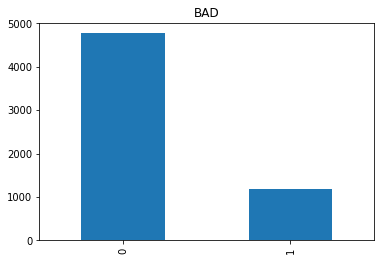

In [334]:
#Frequency distribution of target variable "BAD" and visualizing the target variable
file['BAD'].value_counts().plot.bar(title='BAD')

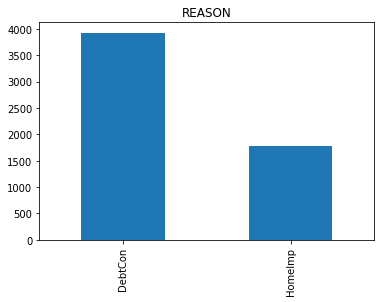

In [335]:
#visualizing the categorical variable REASON
REASON_count= file["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
file["REASON"].value_counts().plot.bar(title='REASON')

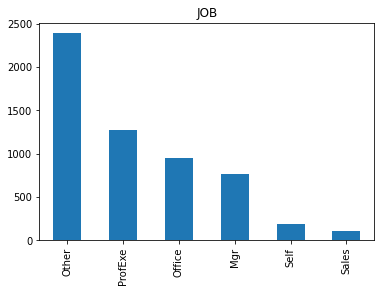

In [336]:
#visualizing the categorical variable JOB
JOB_count= file["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
file["JOB"].value_counts().plot.bar(title='JOB')

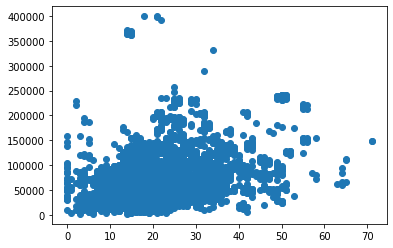

In [337]:
#visualizing the correlation beetween variales 
plt.scatter(file['CLNO'],file['MORTDUE'])

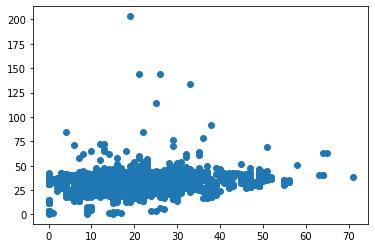

In [338]:
plt.scatter(file['CLNO'],file['DEBTINC'])

**Missing Values**

In [339]:
MissingData=file.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


In [340]:
#dropping rows that have missing data
file.dropna(axis=0, how='any', inplace=True)
file

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [341]:
file.shape

(3364, 13)

**Entropy**

  The English meaning of the word entropy is: it is a state of disorder, confusion, and disorganization.
Claude E. Shannon had expressed this relationship between the probability and the heterogeneity or impurity in the mathematical form with the help of the following equation:

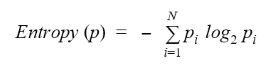

The uncertainty or the impurity is represented as the log to base 2 of the probability of a category (pi). The index (i) refers to the number of possible categories. Here, i = 2 as our problem is a binary classification.

In [342]:
def Entropie(S):
    S= array(S)
    classes_distinctes = set(S[:, 0])
    classes = list(S[:, 0]) # our classes is BAD : 0 or BAD : 1
    s = 0
    for c in classes_distinctes:
        p = classes.count(c)/len(classes)
        s += p*log2(p)
    return(-1.0*s)


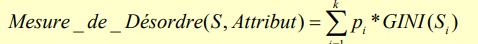

with p:
 * the probability of a category (pi)



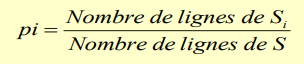

In [343]:
def Mesure_desorde(S, numero_colon_attribut):
    Bonne_mesure_desorde = +inf
    Bonne_valeur_de_repartition = 0
    S = S.to_numpy()
    classes = list(set(S[:, 0]))
    valeurs_attribut = list(set(S[:, numero_colon_attribut]))
    valeurs_attribut.sort()
    Gauche = []
    Droite = []

    for i in range(len(valeurs_attribut)-1):
        v = valeurs_attribut[i]
        Gauche.clear()
        Droite.clear()
        for e in S:
            val_attribut_pour_e = e[numero_colon_attribut]
            if val_attribut_pour_e <= v:
                Gauche.append(e)
            else:
                Droite.append(e)
        pGau = len(Gauche)/len(S)
        pDr = len(Droite)/len(S)
        mesure = (pGau)*GINI(Gauche)+(pDr)*GINI(Droite)
        if mesure < Bonne_mesure_desordre:
            Bonne_mesure_desordre = mesure
            Bonne_valeur_de_repartition = v
    return(Bonne_mesure_desordre, Bonne_valeur_de_repartition)

In [344]:
print(Entropie(file))

0.4337253106573937


**GINI index**

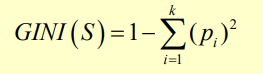

In [345]:
def GINI(S):
    S = array(S)
    clonne_des_classes = list(S[:, -1])
    classes = list(set(S[:, -1]))
    k = len(classes)
    s = 0
    for i in range(k):
        pi = clonne_des_classes.count(classes[i]/len(S[:, -1]))
        s += pi**2
    return 1-s

In [346]:
GINI(file)

1

In [347]:
BAD = file.iloc[:,0]
LOAN = file.iloc[:,1]
MORTDUE = file.iloc[:,2]
type(BAD)
MORTDUE

5        30548.0
7        28502.0
19      102370.0
25       34863.0
26       98449.0
          ...   
5955     57264.0
5956     54576.0
5957     54045.0
5958     50370.0
5959     48811.0
Name: MORTDUE, Length: 3364, dtype: float64

**Information Gain**

Information Gain is the pattern observed in the data and is the reduction in entropy. It can also be seen as the entropy of the parent node minus the entropy of the child node. It is calculated as 1 – entropy. 



In [348]:
def Gain_d_information(S, numero_colon_attribut):
    S = S.to_numpy()
    classes = list(set(S[:, 0]))
    valeurs_attribut = list(set(S[:, numero_colon_attribut]))
    Si = [[]for i in range(len(valeurs_attribut))]
    for e in S:
        e = list(e)
        val_attribut_pour_e = e[numero_colon_attribut]
        numero_sous_ensemble = valeurs_attribut.index(val_attribut_pour_e)
        Si[numero_sous_ensemble].append(e)
    Si = array(Si)
    som = 0
    for sous_ensemble in Si:
        som += (len(sous_ensemble)/len(S))*Entropie(sous_ensemble)
    return(Entropie(S)-som)

Here we use the Information gain for feature selection, by evaluating the gain of each variable in the context of the target variable. In this slightly different usage, the calculation is referred to as mutual information between the two random variables.

In [349]:
print("LOAN :",Gain_d_information(file, 1), "\n",
"MORTDUE :",Gain_d_information(file, 2), "\n",
 "REASON :",Gain_d_information(file, 3), "\n",
"JOB :",Gain_d_information(file, 4), "\n",
"YOJ :",Gain_d_information(file, 5), "\n",
"DEROG :",Gain_d_information(file, 6), "\n",
"DELINQ :",Gain_d_information(file, 7), "\n",
"CLAGE :",Gain_d_information(file, 8), "\n",
"NINQ :",Gain_d_information(file, 9), "\n",
"CLNCO :",Gain_d_information(file, 10), "\n",
 "DEBTING :",Gain_d_information(file, 11))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


LOAN : 0.10076895693219562 
 MORTDUE : 0.43075265905216187 
 REASON : 0.43075265905216187 
 JOB : 2.8308664521470295e-05 
 YOJ : 0.006573646444761216 
 DEROG : 0.014966505036512368 
 DELINQ : 0.028405173576032117 
 CLAGE : 0.03645981105047574 
 NINQ : 0.4337253106573937 
 CLNCO : 0.013862803922385647 
 DEBTING : 0.02498007961306159


***Interpretation***

The distribution will then be made with
attribute 9 (NINQ column -> Number of recent credit inquiries
) which
gives the greatest gain of information

**Data processing**

We have to convert columns 'REASON' and 'JOB' to numeric Dummy variable turns categorical variables into a series of 0 and 1, making them much easier to compare and to avoid problems .

In [350]:
file=pd.get_dummies(file, columns=['REASON','JOB'])
file

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


In [351]:
Y = file.get('BAD')
Y

5       1
7       1
19      0
25      1
26      0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 3364, dtype: int64

In [352]:
# delete the column 'BAD'
del file['BAD']
X= file

In [353]:
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


**Decision Tree Classifier**

In [354]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

We split  data into two pieces training data 67%  and testing data 33%

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33)

In [357]:
len(Y_train) 

2253

In [358]:
len(Y_test)

1111

In [359]:
clf_gini = DecisionTreeClassifier(criterion="gini")

In [360]:
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier()

In [361]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")

In [362]:
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [363]:
print("\n//////////////// Result Using Gini Index //////////////////////\n")
Y_pred_gini = clf_gini.predict(X_test)
print("Confusion Matrix",confusion_matrix(Y_test,Y_pred_gini)*100)
print(X_test,Y_test,Y_pred_gini)
print("Accuracy: ",accuracy_score(Y_test,Y_pred_gini)*100)
print("\n///////////////// Result Using Entropy //////////////////////\n")
Y_pred_entropy = clf_entropy.predict(X_test)
print("Confusion Matrix",confusion_matrix(Y_test,Y_pred_entropy)*100)
print(X_test,Y_test,Y_pred_entropy)
print("Accuracy: ",accuracy_score(Y_test,Y_pred_entropy)*100)


//////////////// Result Using Gini Index //////////////////////

Confusion Matrix [[98100  3000]
 [ 4600  5400]]
       LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
5550  35200  239987.0   43028.0   2.0    0.0     1.0  210.189005   3.0  49.0   
2196  13600   58539.0   67899.0  29.0    1.0     2.0  194.273834   1.0  23.0   
4718  25000   60504.0   93907.0   1.0    0.0     0.0   99.993715   0.0  23.0   
612    7700   76056.0   83643.0  22.0    0.0     0.0  353.195628   0.0  47.0   
5032  26700   18590.0   53462.0  25.0    0.0     0.0  111.995571   1.0  11.0   
...     ...       ...       ...   ...    ...     ...         ...   ...   ...   
3496  18400   75491.0  101745.0   0.0    0.0     0.0  279.370051   1.0  20.0   
134    4900   58688.0   63348.0   9.0    0.0     3.0  179.162575   2.0  31.0   
501    7000   64255.0   68389.0   4.0    0.0     0.0   80.152431   2.0  19.0   
5129  27500  131269.0  211014.0  10.0    0.0     0.0  234.351289   2.0  26.0   
1377  